## $\text{Importing Necessary Libraries}$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [ ]:
import time as tc

# $\textit{Random Walk Problem}$


### $\text{Simulating the process}$

The Mean displacement of the drunkard is 9.6645.
The RMS displacement of the drunkard is 13.2384.


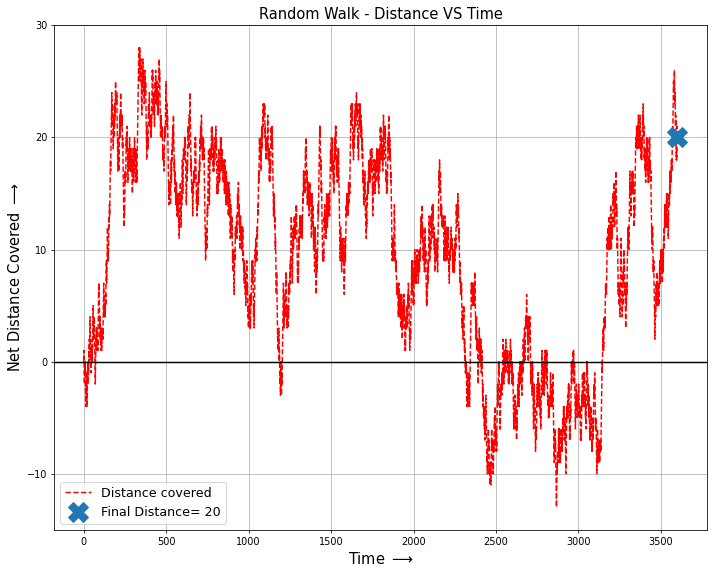

In [ ]:
initial_pos = 0.0
dist = 0.0
pos = np.array([0.0])
time = np.array([0.0])
step_length = np.array([-1, 1])

for t in range(1,3601)    :
    rand_num = np.random.choice(step_length)
    dist = dist + rand_num
    
    pos = np.append(pos,dist)
    time = np.append(time,float(t))

print("The Mean displacement of the drunkard is %.4f." %np.mean(pos))
print("The RMS displacement of the drunkard is %.4f." %np.sqrt(np.mean(pos**2)))
plt.figure(dpi=70,figsize=(10,8))
plt.plot(time,pos,'r--',label='Distance covered')
plt.axhline(y=0,color='k')
plt.plot(time[-1],pos[-1], 'X',markersize=20,label='Final Distance= %d' %pos[-1])
plt.xlabel("Time $\longrightarrow$",fontsize=15)
plt.ylabel("Net Distance Covered $\longrightarrow$",fontsize=15)
plt.title("Random Walk - Distance VS Time",fontsize=15)
plt.grid()
plt.legend(prop={'size':13})
plt.tight_layout(pad=0)

### $\text{Generating 1000 realization of random sequence}$

In [ ]:
seeds = np.array([i for i in range(1000)])
pos_seed = []

for seed in seeds:
    np.random.seed(seed)
    pos_init = 0.0
    dist = 0.0
    pos_rest = [0.0]
    time = [0.0]
    step_length = np.array([-1, 1])

    for t in range(1,3601):
        rand_num = np.random.choice(step_length)
        dist = dist + rand_num
    
        time.append(t)
        pos_rest.append(dist)
        
    pos_seed.append(pos_rest)

### $\text{Graph for random walk of any three realization}$

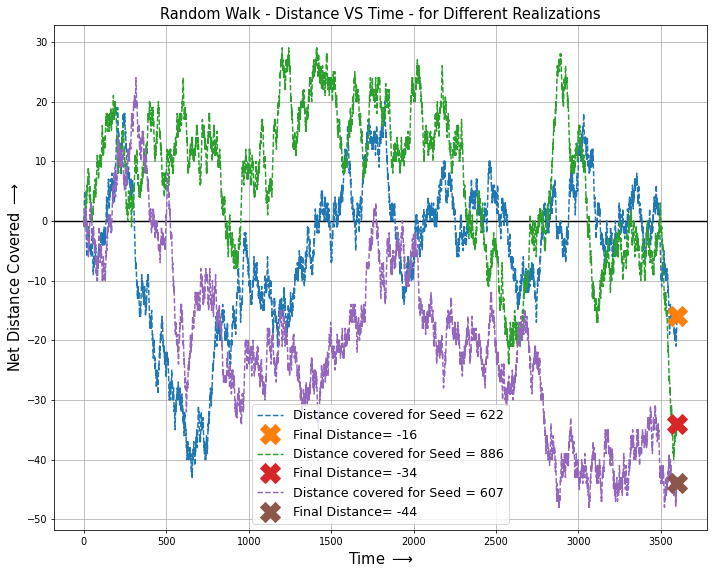

In [ ]:
plt.figure(dpi=70,figsize=(10,8))
plt.axhline(y=0,color='k')
for i in range(3):
    f=np.random.choice(seeds)
    plt.plot(time,pos_seed[f],'--',label='Distance covered for Seed = %d' %f)
    plt.plot(time[-1],pos_seed[f][-1], 'X',markersize=20,label='Final Distance= %d' %pos_seed[f][-1])
plt.xlabel("Time $\longrightarrow$",fontsize=15)
plt.ylabel("Net Distance Covered $\longrightarrow$",fontsize=15)
plt.title("Random Walk - Distance VS Time - for Different Realizations",fontsize=15)
plt.grid(True)
plt.legend(prop={'size':13})
plt.tight_layout(pad=0)

### $\text{Histogram of Displacement of the drunkard - With Mean and R.M.S Displacement}$

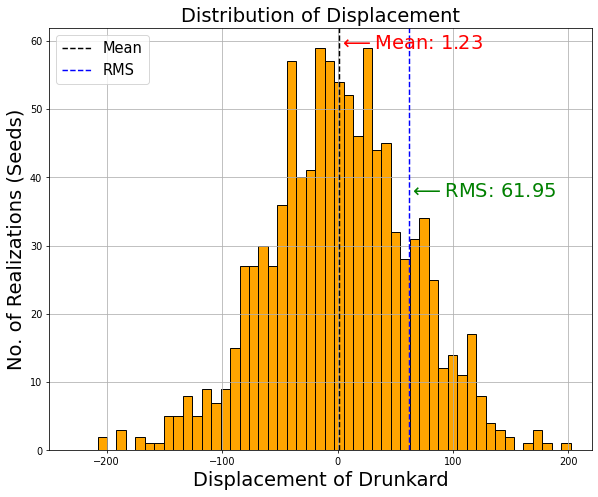

In [ ]:
pos_final = []
rms = 0.0
mean = 0.0
for i in range(len(seeds)):
    final = pos_seed[i][-1]
    pos_final.append(final)
    rms += final**2

rms = np.sqrt(rms/len(pos_final))
mean = np.mean(pos_final)

plt.figure(dpi=70,figsize=(10,8))
plt.hist(pos_final,bins=50,color='orange',edgecolor='k')
plt.axvline(mean,color='k',linestyle='dashed',linewidth=1.5,label='Mean')
plt.axvline(rms,color='b',linestyle='dashed',linewidth=1.5,label='RMS')
min_ylim, max_ylim = plt.ylim()
plt.text(mean,max_ylim*0.95, '$\longleftarrow$Mean: %.2f' %mean,fontsize=20,color='red')
plt.text(rms,max_ylim*0.6, '$\longleftarrow$RMS: %.2f' %rms,fontsize=20,color='green')
plt.xlabel("Displacement of Drunkard",fontsize=20)
plt.ylabel("No. of Realizations (Seeds)",fontsize=20)
plt.title("Distribution of Displacement",fontsize=20)
plt.xlim(-250,220)
plt.legend(prop={'size':15},loc='upper left')
plt.grid()

### $\text{Variation of Mean and R.M.S Displacement}$

#### $\text{With Increasing time step }$

In [ ]:
start = tc.process_time()
seeds = np.array([i for i in range(100)])
time_steps = np.array([i for i in range(500,10001,500)])
mean_array=[]
rms_array=[]
for time in time_steps:
    pos_seed = []
    pos_final = []
    mean = 0.0
    rms = 0.0
    for seed in seeds:
        np.random.seed(seed)
        pos_init = 0.0
        dist = 0.0
        pos_rest = []
        pos_rest.append(pos_init)

        t = 0.0
        step_length = np.array([-1, 1])

        while t<=time:    
            rand_num = np.random.choice(step_length)
            dist = dist + rand_num
            t += 1.0

            pos_rest.append(dist)

        pos_seed.append(pos_rest)


    for i in range(len(seeds)):
        final = pos_seed[i][-1]
        pos_final.append(final)
        rms += final**2

    rms = np.sqrt(rms/len(pos_final))
    mean = np.mean(pos_final)
    mean_array.append(mean)
    rms_array.append(rms)
    print("Mean is %.2f and RMS is %.2f. Square root of 'time' (number of steps) is: %.4f" %(mean,rms,np.sqrt(time)))

print("Total time taken is: %.4f" %(tc.process_time()-start))

Mean is 1.88 and RMS is 20.59. Square root of 'time' (number of steps) is: 22.3607
Mean is 2.32 and RMS is 29.24. Square root of 'time' (number of steps) is: 31.6228
Mean is 4.12 and RMS is 38.82. Square root of 'time' (number of steps) is: 38.7298
Mean is 4.02 and RMS is 46.09. Square root of 'time' (number of steps) is: 44.7214
Mean is 2.80 and RMS is 53.07. Square root of 'time' (number of steps) is: 50.0000
Mean is 3.28 and RMS is 61.77. Square root of 'time' (number of steps) is: 54.7723
Mean is 1.58 and RMS is 64.24. Square root of 'time' (number of steps) is: 59.1608
Mean is 3.16 and RMS is 70.11. Square root of 'time' (number of steps) is: 63.2456
Mean is 7.82 and RMS is 74.88. Square root of 'time' (number of steps) is: 67.0820
Mean is 7.48 and RMS is 78.26. Square root of 'time' (number of steps) is: 70.7107
Mean is 8.00 and RMS is 79.35. Square root of 'time' (number of steps) is: 74.1620
Mean is 6.48 and RMS is 78.89. Square root of 'time' (number of steps) is: 77.4597
Mean

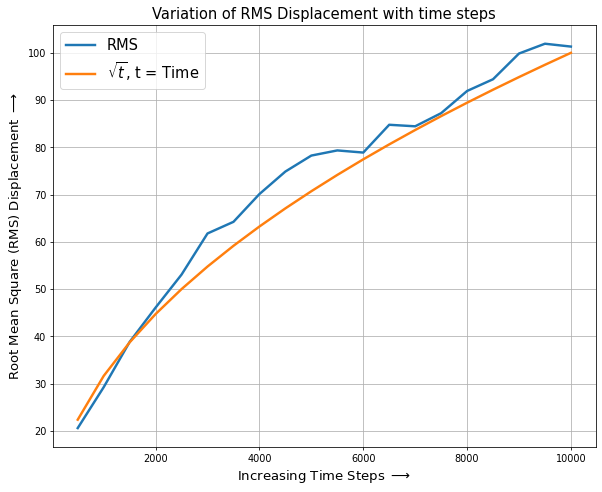

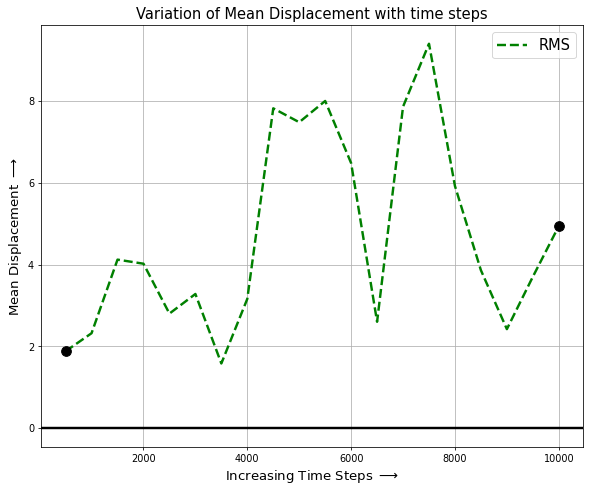

In [ ]:
plt.figure(dpi=70,figsize=(10,8))
plt.plot(time_steps,rms_array,label='RMS',linewidth=2.5)
plt.plot(time_steps,np.sqrt(time_steps),label='$\sqrt{t}$, t = Time',linewidth=2.5)
plt.xlabel('Increasing Time Steps $\longrightarrow$',fontsize=13.7)
plt.ylabel('Root Mean Square (RMS) Displacement $\longrightarrow$',fontsize=13.7)
plt.title("Variation of RMS Displacement with time steps",fontsize=15)
plt.legend(prop={'size':15})
plt.grid()

plt.figure(dpi=70,figsize=(10,8))
plt.plot(time_steps,mean_array,'g--',label='RMS',linewidth=2.5)
plt.plot(time_steps[0],mean_array[0], 'k.',markersize=20)
plt.plot(time_steps[-1],mean_array[-1], 'k.',markersize=20)
plt.axhline(y=0,color='k',linewidth=2.5)
plt.xlabel('Increasing Time Steps $\longrightarrow$',fontsize=13.7)
plt.ylabel('Mean Displacement $\longrightarrow$',fontsize=13.7)
plt.title("Variation of Mean Displacement with time steps",fontsize=15)
plt.legend(prop={'size':15})
plt.grid()

#### $\text{With Increasing Realization}$

No of Realizations running: 100
Mean is 2.90 and RMS is 46.51.


No of Realizations running: 200
Mean is 1.03 and RMS is 44.80.


No of Realizations running: 300
Mean is 0.93 and RMS is 45.08.


No of Realizations running: 400
Mean is 3.85 and RMS is 45.03.


No of Realizations running: 500
Mean is 1.54 and RMS is 44.03.


No of Realizations running: 600
Mean is 1.19 and RMS is 43.87.


No of Realizations running: 700
Mean is -0.18 and RMS is 43.47.


No of Realizations running: 800
Mean is -0.12 and RMS is 43.59.


No of Realizations running: 900
Mean is 1.36 and RMS is 43.78.


No of Realizations running: 1000
Mean is 1.21 and RMS is 43.85.


Total time taken is: 364.4219


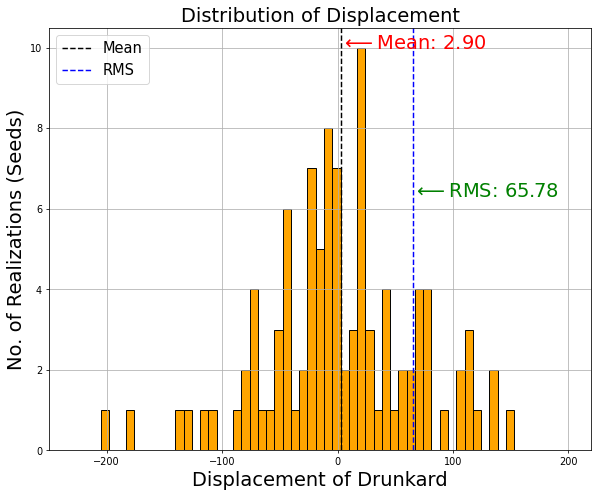

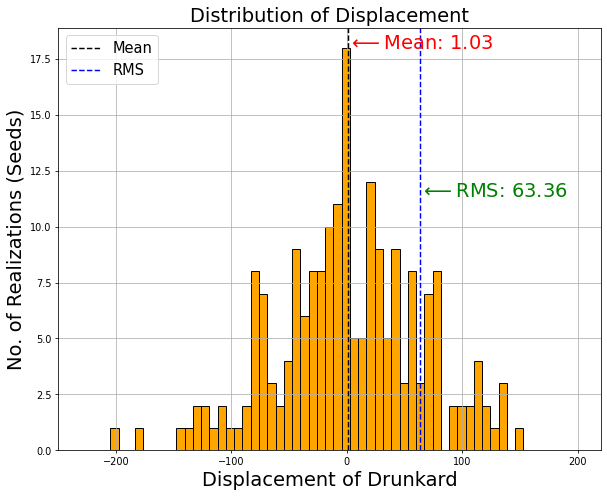

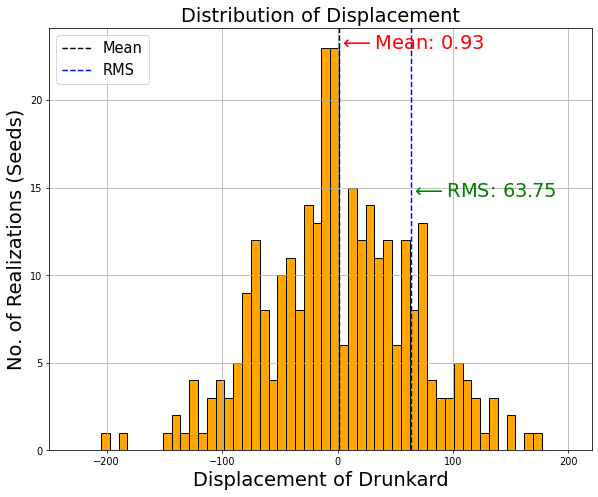

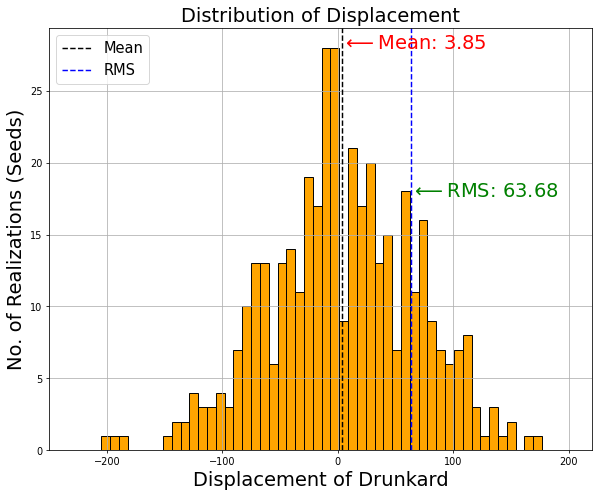

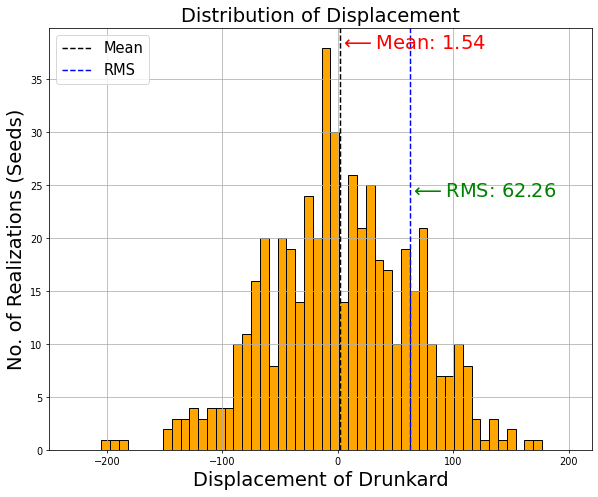

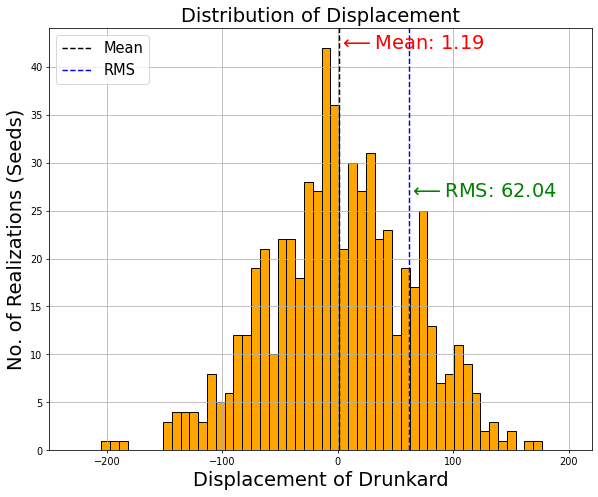

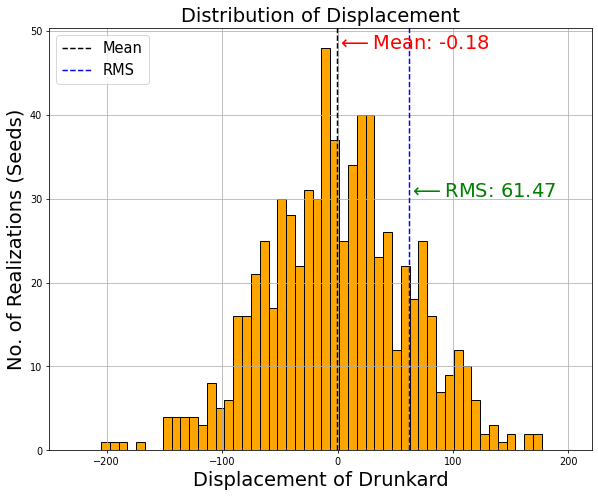

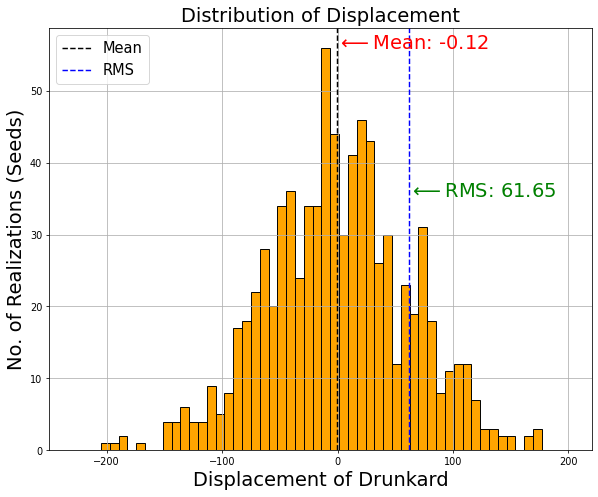

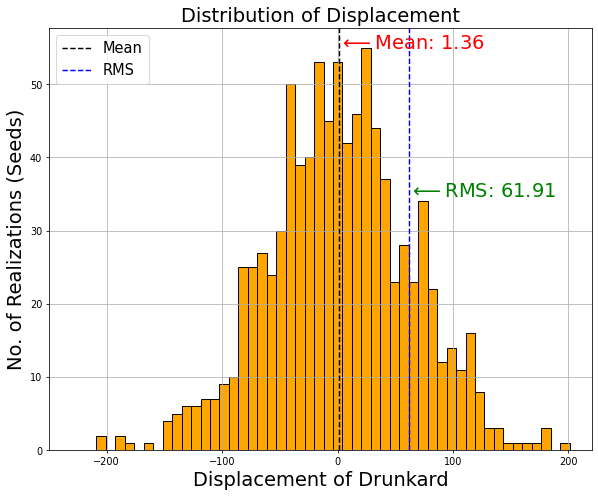

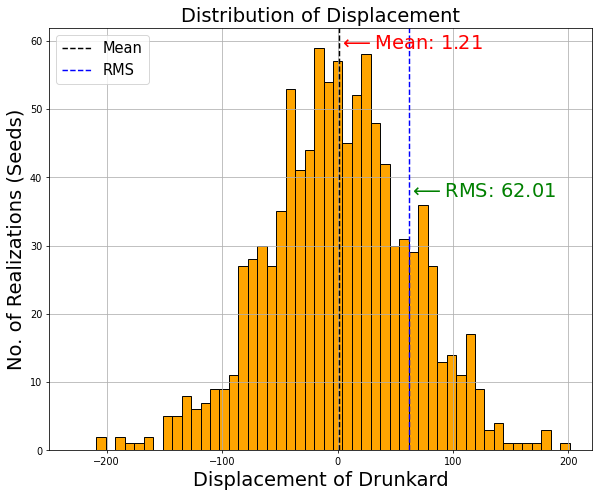

In [ ]:
start = tc.process_time()
seed_array = np.array([i for i in range(100,1001,100)])
mean_array=[]
rms_array=[]
for seed_number in seed_array:
    seeds = np.array([i for i in range(seed_number)])
    print("No of Realizations running: %d" %seed_number)
    pos_seed = []
    pos_final = []
    mean = 0.0
    rms = 0.0
    for seed in seeds:
        np.random.seed(seed)
        pos_init = 0.0
        dist = 0.0
        pos_rest = []
        pos_rest.append(pos_init)

        t = 0.0
        step_length = np.array([-1, 1])

        while t<=3600.0:    
            rand_num = np.random.choice(step_length)
            dist = dist + rand_num
            t += 1.0

            pos_rest.append(dist)

        pos_seed.append(pos_rest)

    pos_final = []
    rms = 0.0
    mean = 0.0
    for i in range(len(seeds)):
        final = pos_seed[i][-1]
        pos_final.append(final)
        rms += final**2

    rms = np.sqrt(rms/len(pos_final))
    mean = np.mean(pos_final)

    plt.figure(dpi=70,figsize=(10,8))
    plt.hist(pos_final,bins=50,color='orange',edgecolor='k')
    plt.axvline(mean,color='k',linestyle='dashed',linewidth=1.5,label='Mean')
    plt.axvline(rms,color='b',linestyle='dashed',linewidth=1.5,label='RMS')
    min_ylim, max_ylim = plt.ylim()
    plt.text(mean,max_ylim*0.95, '$\longleftarrow$Mean: %.2f' %mean,fontsize=20,color='red')
    plt.text(rms,max_ylim*0.6, '$\longleftarrow$RMS: %.2f' %rms,fontsize=20,color='green')
    plt.xlabel("Displacement of Drunkard",fontsize=20)
    plt.ylabel("No. of Realizations (Seeds)",fontsize=20)
    plt.title("Distribution of Displacement",fontsize=20)
    plt.xlim(-250,220)
    plt.legend(prop={'size':15},loc='upper left')
    plt.grid()
    
    for i in range(len(seeds)):
        final = pos_seed[i][-1]
        pos_final.append(final)
        rms += final**2

    rms = np.sqrt(rms/len(pos_final))
    mean = np.mean(pos_final)
    mean_array.append(mean)
    rms_array.append(rms)
    print("Mean is %.2f and RMS is %.2f." %(mean,rms))
    print('\n')

print("Total time taken is: %.4f" %(tc.process_time()-start))

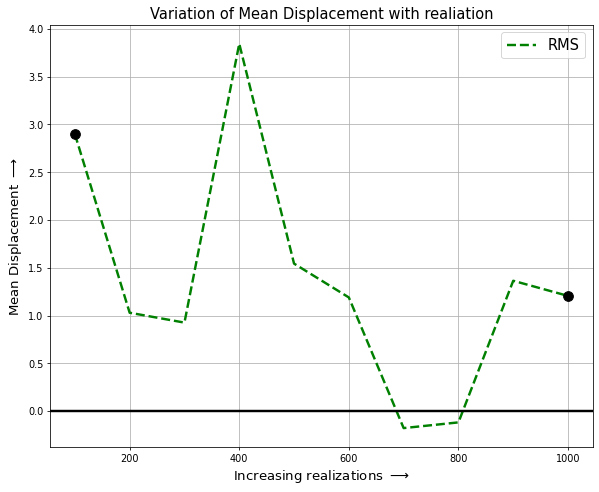

In [ ]:
plt.figure(dpi=70,figsize=(10,8))
plt.plot(seed_array,mean_array,'g--',label='RMS',linewidth=2.5)
plt.plot(seed_array[0],mean_array[0], 'k.',markersize=20)
plt.plot(seed_array[-1],mean_array[-1], 'k.',markersize=20)
plt.axhline(y=0,color='k',linewidth=2.5)
plt.xlabel('Increasing realizations $\longrightarrow$',fontsize=13.7)
plt.ylabel('Mean Displacement $\longrightarrow$',fontsize=13.7)
plt.title("Variation of Mean Displacement with realiation",fontsize=15)
plt.legend(prop={'size':15})
plt.grid()